# 1. Dependencies

In [1]:
import tensorflow as tf
import numpy as np

# 2. Text as Data

In [2]:
text = """
The quick brown fox jumps over the lazy dog.
A quick brown rabbit hops over the lazy frog.
"""

## Preprocessing

In [3]:
# 1. Create Vocabulary

vocab = sorted(list(set(text)))
vocab_size = len(vocab)
print("Vocabulary:", vocab_size)

# 2. Create Character-to-index and index-to-character mappings
char_to_index = {char: index for index, char in enumerate(vocab)}
index_to_char = np.array(vocab)


# 3. Create Sequences
seq_length = 10 # Length of input sequences
data_x = []
data_y = []

for i in range(0, len(text) - seq_length, 1):
    seq_in = text[i:i + seq_length]
    seq_out = text[i + seq_length]
    data_x.append([char_to_index[char] for char in seq_in])
    data_y.append(char_to_index[seq_out])

n_patterns = len(data_x)
print("Total Patterns:", n_patterns)

# Reshape X and normalize
X = np.reshape(data_x, (n_patterns, seq_length, 1)) / float(vocab_size)


# One-hot encode the output variable
y = tf.keras.utils.to_categorical(data_y)

Vocabulary: 31
Total Patterns: 82


# 3. Model Architecture (Simple RNN)

In [4]:
# Build the model

model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(256, input_shape=(X.shape[1], X.shape[2])),
    tf.keras.layers.Dense(y.shape[1], activation='softmax')
])


# Compile the Model
model.compile(loss='categorical_crossentropy', optimizer='adam')

# Print Model Summary
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 256)                 │         264,192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 31)                  │           7,967 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 272,159 (1.04 MB)

 Trainable params: 272,159 (1.04 MB)

 Non-trainable params: 0 (0.00 B)

# 4. Training

Epoch 1/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.1944
Epoch 2/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.1898
Epoch 3/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.1532
Epoch 4/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.1667
Epoch 5/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.1794
Epoch 6/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.1524
Epoch 7/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.1679
Epoch 8/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.1757
Epoch 9/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.1873
Epoch 10/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.1523 
Epoch 11/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.1488
Epoch 12/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.1326
Epoch 13/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.1486
Epoch 14/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.1147
Epoch 15/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.2033
Epoch 16/200
3/3 ━

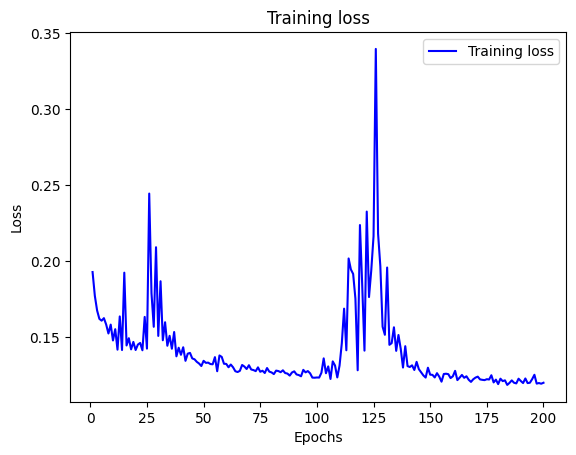

In [11]:
# Train the model

# model.fit(X, y, epochs=250, batch_size=32)

import matplotlib.pyplot as plt #import matplotlib to plot the loss

# ... (your model setup and compilation) ...

history = model.fit(X, y, epochs=200, batch_size=32)

loss = history.history['loss']
epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'b', label='Training loss')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#or print out the loss
#print(history.history['loss'])


# 5. Text Generation

In [12]:
# Generate Text
def generate_text(model, char_to_index, index_to_char, seed_text, seq_length, num_chars_to_generate):
    generated_text = seed_text
    for _ in range(num_chars_to_generate):
      x_pred = np.reshape([char_to_index[char] for char in seed_text], (1, len(seed_text), 1)) / float(len(char_to_index))
      prediction = model.predict(x_pred, verbose=0)
      index = np.argmax(prediction)
      next_char = index_to_char[index]
      generated_text += next_char
      seed_text = seed_text[1:] + next_char
    return generated_text



# 6. Example Usage

In [13]:
# Example Usage
seed_text = "The quick "
generated_text = generate_text(model, char_to_index, index_to_char, seed_text, seq_length, 80)
print(generated_text)

The quick brown fox jumps over the lazy frg.
A quick brown fox jumps over the lazy frg.
A 
